# Training and evaluation

In [1]:
# getting the dataset
import pandas as pd
FEATURES = ['Depth (m)', 'qc (MPa)', 'fs (kPa)','Rf (%)', 'σ,v (kPa)', 'u0 (kPa)',"σ',v (kPa)", 'Qtn (-)', 'Fr (%)']
LABELS = 'Oberhollenzer_classes'
FILEPATH_TRAIN = '../data/model_ready/dataset_train.csv'
FILEPATH_TEST = '../data/model_ready/dataset_test.csv'
df_train = pd.read_csv(FILEPATH_TRAIN, header=0)
df_test = pd.read_csv(FILEPATH_TEST)
df_full = pd.concat([df_train, df_test], axis=0)

# remove class 3.0
# df_train = df_train[df_train[LABELS] != 3.0]

df_train.head()

,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%),Oberhollenzer_classes
0,850,CPT,Zell basin,0.05,6.85,5.8,0.09,0.95,0.49,0.46,263.95,0.09,4.0
1,850,CPT,Zell basin,0.06,7.92,11.6,0.17,1.14,0.59,0.55,315.95,0.17,4.0
2,850,CPT,Zell basin,0.07,9.44,23.2,0.21,1.33,0.69,0.64,339.46,0.21,4.0
3,850,CPT,Zell basin,0.08,10.84,23.2,0.23,1.52,0.78,0.74,364.64,0.23,4.0
4,850,CPT,Zell basin,0.09,11.28,25.6,0.22,1.71,0.88,0.83,369.59,0.22,4.0


In [12]:
df_test.head()

,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%),Oberhollenzer_classes
0,849,CPT,Zell basin,0.39,0.06,0.01,0.01,7.41,3.83,3.58,23.33,0.01,4.0
1,849,CPT,Zell basin,0.40,0.22,0.01,0.01,7.60,3.92,3.68,13.40,0.01,4.0
2,849,CPT,Zell basin,0.41,0.05,0.01,0.01,7.79,4.02,3.77,12.04,0.01,4.0
3,849,CPT,Zell basin,0.42,0.02,0.01,0.04,7.98,4.12,3.86,4.32,0.05,4.0
4,849,CPT,Zell basin,0.43,0.01,0.01,0.11,8.17,4.22,3.95,0.49,0.59,4.0


## Exploring performance boundaries and computational effort

### Dummy classifier

In [2]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

X_train = df_train[FEATURES]
y_train = df_train[LABELS]
X_test = df_test[FEATURES]
y_test = df_test[LABELS]

dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     24578
         2.0       0.00      0.00      0.00     46628
         3.0       0.00      0.00      0.00      2196
         4.0       0.00      0.00      0.00     22981
         5.0       0.22      1.00      0.35     47640
         6.0       0.00      0.00      0.00     41385
         7.0       0.00      0.00      0.00     35553

    accuracy                           0.22    220961
   macro avg       0.03      0.14      0.05    220961
weighted avg       0.05      0.22      0.08    220961



c:\Users\Zakieh\AppData\Local\pypoetry\Cache\virtualenvs\cpt-to-soiltype-SlwqZ-ZC-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zakieh\AppData\Local\pypoetry\Cache\virtualenvs\cpt-to-soiltype-SlwqZ-ZC-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zakieh\AppData\Local\pypoetry\Cache\virtualenvs\cpt-to-soiltype-SlwqZ-ZC-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with

Some new terms from the classification report:
- support: number of occurrences of each class in y_true
- weighted avg: average of the metrics, weighted by the support values
- macro avg: average of the metrics for each class. Macro avg for recall is the same as balanced accuracy.

In [3]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         1.0       0.55      0.44      0.49     24578
         2.0       0.37      0.36      0.37     46628
         3.0       0.00      0.00      0.00      2196
         4.0       0.40      0.05      0.09     22981
         5.0       0.38      0.39      0.39     47640
         6.0       0.25      0.25      0.25     41385
         7.0       0.39      0.69      0.49     35553

    accuracy                           0.37    220961
   macro avg       0.34      0.31      0.30    220961
weighted avg       0.37      0.37      0.35    220961



c:\Users\Zakieh\AppData\Local\pypoetry\Cache\virtualenvs\cpt-to-soiltype-SlwqZ-ZC-py3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Zakieh\AppData\Local\pypoetry\Cache\virtualenvs\cpt-to-soiltype-SlwqZ-ZC-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zakieh\AppData\Local\pypoetry

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.41      0.43      0.42     24578
         2.0       0.43      0.42      0.43     46628
         3.0       0.25      0.08      0.12      2196
         4.0       0.30      0.29      0.29     22981
         5.0       0.40      0.38      0.39     47640
         6.0       0.36      0.41      0.39     41385
         7.0       0.40      0.38      0.39     35553

    accuracy                           0.39    220961
   macro avg       0.36      0.34      0.35    220961
weighted avg       0.39      0.39      0.39    220961



In [5]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)
print(classification_report(y_test, y_pred_et))

              precision    recall  f1-score   support

         1.0       0.43      0.44      0.43     24578
         2.0       0.45      0.44      0.45     46628
         3.0       0.26      0.06      0.10      2196
         4.0       0.30      0.29      0.30     22981
         5.0       0.41      0.40      0.40     47640
         6.0       0.37      0.43      0.40     41385
         7.0       0.46      0.43      0.44     35553

    accuracy                           0.41    220961
   macro avg       0.38      0.36      0.36    220961
weighted avg       0.41      0.41      0.41    220961



In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.43      0.43      0.43     24578
         2.0       0.47      0.46      0.46     46628
         3.0       0.24      0.06      0.10      2196
         4.0       0.31      0.29      0.30     22981
         5.0       0.41      0.40      0.41     47640
         6.0       0.37      0.43      0.40     41385
         7.0       0.46      0.44      0.45     35553

    accuracy                           0.41    220961
   macro avg       0.38      0.36      0.36    220961
weighted avg       0.41      0.41      0.41    220961



#

## Scaling and balancing the dataset

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

# Step 1: Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Balancing with undersampling and oversampling
# # Create dictionary for undersampling the 3 biggest classes
# class_counts = y_train.value_counts()
# biggest_classes = class_counts.nlargest(3).index
# undersample_dict = {cls: int(class_counts.min()) for cls in biggest_classes}

# undersampler = RandomUnderSampler(sampling_strategy=undersample_dict, random_state=42)
# X_train, y_train = undersampler.fit_resample(X_train, y_train)

# smote = SMOTE(random_state=42, sampling_strategy='auto')
# X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 3: Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.41      0.43      0.42     24578
         2.0       0.43      0.43      0.43     46628
         3.0       0.23      0.05      0.08      2196
         4.0       0.30      0.28      0.29     22981
         5.0       0.40      0.40      0.40     47640
         6.0       0.36      0.42      0.39     41385
         7.0       0.45      0.40      0.42     35553

    accuracy                           0.40    220961
   macro avg       0.37      0.34      0.35    220961
weighted avg       0.40      0.40      0.39    220961



## Pipeline for training and evaluation
To avoid data leakage and for a more condense implementation we use the `Pipeline` class from `sklearn`.

In [8]:
# Import necessary libraries
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Make a pipeline for scaling, undersampling, oversampling, and training
pipeline = make_pipeline(
    StandardScaler(),
    # RandomUnderSampler(random_state=42, sampling_strategy=undersample_dict),
    SMOTE(random_state=42, sampling_strategy='auto'),
    KNeighborsClassifier(n_neighbors=5)
)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.37      0.47      0.42     24578
         2.0       0.44      0.41      0.42     46628
         3.0       0.19      0.19      0.19      2196
         4.0       0.28      0.31      0.29     22981
         5.0       0.41      0.34      0.37     47640
         6.0       0.37      0.41      0.39     41385
         7.0       0.45      0.41      0.43     35553

    accuracy                           0.39    220961
   macro avg       0.36      0.36      0.36    220961
weighted avg       0.39      0.39      0.39    220961



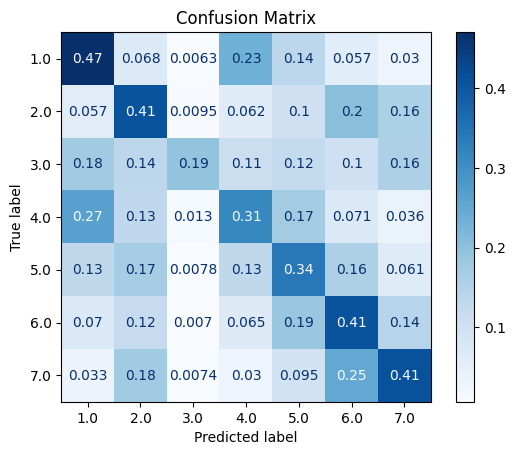

In [9]:
# Step 6: Compute confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Visualise the confusion matrix in the standard scikit-learn way
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## Cross validation

In [10]:
from sklearn.model_selection import cross_validate, StratifiedKFold
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)

# Create pipeline for scaling, oversampling, and KNN model
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42, sampling_strategy='auto'),
    KNeighborsClassifier(n_neighbors=5)
)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['balanced_accuracy', 'precision_macro', 'recall_macro', 'accuracy']
cross_val_results = cross_validate(pipeline, X_combined, y_combined, cv=cv, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Results:")
print("Balanced Accuracy:", cross_val_results['test_balanced_accuracy'].mean())
print("Precision:", cross_val_results['test_precision_macro'].mean())
print("Recall:", cross_val_results['test_recall_macro'].mean())
print("Accuracy:", cross_val_results['test_accuracy'].mean())

# print all values for balanced accuracy
print(cross_val_results['test_balanced_accuracy'])


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

New try with grouped splitter

In [11]:
from sklearn.model_selection import cross_validate, StratifiedKFold, GroupKFold

ID = "ID"
X_train = df_train[FEATURES + [ID]]
y_train = df_train[LABELS]
X_test = df_test[FEATURES + [ID]]
y_test = df_test[LABELS]

X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)
groups = X_combined[ID]  # Use the drillhole ID to group the data

# Drop the ID column for training
X_combined = X_combined[FEATURES]

# Create pipeline for scaling, oversampling, and KNN model
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42, sampling_strategy='auto'),
    KNeighborsClassifier(n_neighbors=5)
)

# Perform cross-validation using GroupKFold to ensure no drillhole is split between train and test
cv = GroupKFold(n_splits=5)
scoring = ['balanced_accuracy', 'precision_macro', 'recall_macro', 'accuracy']
cross_val_results = cross_validate(pipeline, X_combined, y_combined, cv=cv, groups=groups, scoring=scoring)

# Print cross-validation results
print("Cross-Validation Results:")
print("Balanced Accuracy:", cross_val_results['test_balanced_accuracy'].mean())
print("Precision:", cross_val_results['test_precision_macro'].mean())
print("Recall:", cross_val_results['test_recall_macro'].mean())
print("Accuracy:", cross_val_results['test_accuracy'].mean())

# print all values for balanced accuracy
print(cross_val_results['test_balanced_accuracy'])

Cross-Validation Results:
Balanced Accuracy: 0.36366846531943675
Precision: 0.3379056758446408
Recall: 0.36366846531943675
Accuracy: 0.3855910042160221
[0.35103631 0.36325454 0.36486082 0.36499763 0.37419303]
